# Text_Generator_Project

In [156]:
# Install Packages
!pip install -q openai
!pip install -q python-dotenv

In [208]:
import os
import openai
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

True

In [209]:
# Set private API key
openai.api_key = (os.getenv('OPENAI_KEY'))
URL = "https://api.openai.com/v1/completions

# Set message text
messages = [
    {"role": "system", "content": "You are a professional marketing assistant."},
]

# Set data which will inlfuence model 
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


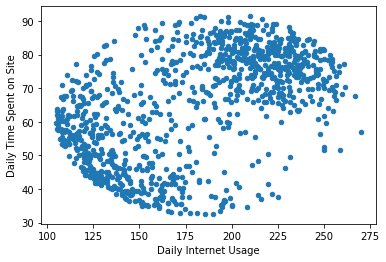

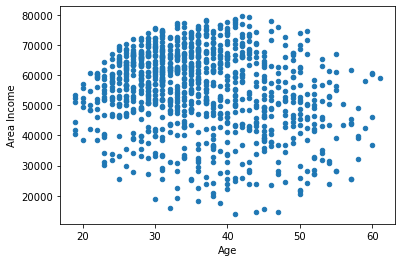

In [216]:
# OPTIONAL
# Examine Data for any patterns
df.plot(x='Daily Internet Usage', y='Daily Time Spent on Site', kind='scatter')
df.plot(x='Age', y='Area Income', kind='scatter')
plt.show()

In [201]:
# Clean data
clean_df = df.drop(df.columns[[0,1,2,3,5,6,7,8]], axis = 1)
clean_df = clean_df.iloc[1: , :]

# Set up the prompt using the headlines in the CSV file
prompt = "Generate a new marketing email headline based on the following successful and unsuccessful examples:\n\n"

for idx in clean_df.index:
    if ((clean_df['Clicked on Ad'][idx] == 1) and (len(prompt.split()) < 1800)):
        prompt += clean_df['Ad Topic Line'][idx] + "\n"
    #else:
        #prompt += "- Unsuccessful: " + clean_df['Ad Topic Line'][idx] + "\n" 

1621


In [221]:
# Email Topic Line Generation Model
# Uses payloads to pull responses

# temperature is "Randomness"
# top_p dictates how common of words are considered
# e.g., top_p:0.3 means that only the tokens comprising the top 30% probability mass are considered

payload = {
"model": "text-davinci-003",
"prompt": prompt,
"max_tokens": 20,
"temperature" : 1.0,
"top_p":1.0,
"n" : 10,
"stream": False,
"presence_penalty":0,
"frequency_penalty":0,
}

headers = {
"Content-Type": "application/json",
"Authorization": f"Bearer {openai.api_key}"
}

response = requests.post(URL, headers=headers, json=payload, stream=False)
a = response.json()

# Prints the entire payload output
# response.content

In [222]:
# Print 10 formatted sample headers from output json file
for i in range(10):
    print((a["choices"][i]["text"]) + "\n")

Open-source methodical encryption
Agile background intranet
Intuitive composite info-medi

Open-architected client-server access
Reactive foresight-oriented Graphical User Interface

Compatible didactic standardization
Dynamic secure installation
Optimized mission-critical instruction set


Business-focused overarching asset
Diverse executive concept
Organic didactic integration
Integrated user

Protected uniform service-desk
Advanced system-worthy forecast
Centralized dynamic encryption
Up

Parallel even-keeled extranet
Robust inverted definition
Reverse-engine

Adaptive 5thgeneration model
Open-architected content-based supervision
Optimized

Synchronized user-facing definition
Ergonomic client-server infrastructure
Optimized dis

Function-based systematic definition
Phased disintermediate algorithm
Multi-tiered system-worthy

Re-engineered even-keeled analyzer
Ergonomic 4thgeneration user interface




In [225]:
# Email Body Generation Model
message = input("Generation prompt : ")
if message:
    message = "Generate a long promotional advertisement email with the topic line:" + message
else:
    message = "Generate a long promotional advertisement email for the new laptop from QWERTY Studios, the FlipBook S."

payload = {
"model": "text-davinci-003",
"prompt": message,
"suffix": "Thank you for being a proud subscriber.",
"max_tokens": 2048,
"temperature" : 1.0,
"top_p":0,
"n" : 1,
"stream": False,
"presence_penalty":0,
"frequency_penalty":0,
}

headers = {
"Content-Type": "application/json",
"Authorization": f"Bearer {openai.api_key}"
}

response = requests.post(URL, headers=headers, json=payload, stream=False)
a = response.json()

Generation prompt : 


In [227]:
print(a["choices"][0]["text"])



Dear Valued Subscriber,

We are proud to announce the launch of the FlipBook S, the latest laptop from QWERTY Studios. This sleek and powerful laptop is designed to meet the needs of today's modern user.

The FlipBook S is packed with features that make it the perfect choice for work, play, and everything in between. It has a powerful Intel Core i7 processor, 8GB of RAM, and a 256GB SSD for lightning-fast performance. The 15.6" Full HD display is perfect for watching movies, playing games, and editing photos. And with its long-lasting battery, you can stay productive all day long.

The FlipBook S also comes with a range of ports, including USB-C, HDMI, and a microSD card reader. Plus, it has a built-in webcam and microphone for video conferencing and streaming. And with its lightweight design, you can take it with you wherever you go.

We are confident that the FlipBook S will exceed your expectations. So don't wait any longer - get your hands on the FlipBook S today and experience t